In [5]:
#A5Q1

import numpy as np
import matplotlib.pyplot as plt
X=np.array([6.1101,5.5277,8.5186])
y=np.array([17.592,9.1302,13.662])
m=len(y)
X_b=np.c_[np.ones(m),X]
theta=np.zeros(2)
alpha=0.01
iterations=1500

def compute_cost(X,y,theta):
    errors=X@theta-y
    return(1/(2*m))*np.dot(errors,errors)
def gradient_descent(X,y,theta,alpha,iterations):
    for _ in range(iterations):
        gradient=(1/m)*(X.T @ (X @theta-y))
        theta-=alpha*gradient
    return theta
theta=gradient_descent(X_b,y,theta,alpha,iterations)
print("Learned theta:",theta)

Learned theta: [4.02750103 1.37581788]


In [6]:
#A5Q2

import numpy as np
import matplotlib.pyplot as plt
X=np.array([[2104,5],[1600,3],[2400,4]])
y=np.array([399900,329900,369000])
m=len(y)
X_mean=X.mean(axis=0)
X_std=X.std(axis=0)
X_norm=(X-X_mean)/X_std
X_b=np.c_[np.ones(m),X_norm]
theta=np.zeros(X_b.shape[1])
alpha=0.01
iterations=400
def gradient_descent(X,y,theta,alpha,iterations):
    for _ in range(iterations):
        gradient=(1/m)*(X.T @ (X @theta-y)) 
        theta-=alpha*gradient
    return theta
theta=gradient_descent(X_b,y,theta,alpha,iterations)
print("Learned theta:",theta)

Learned theta: [359691.97735379   5161.17119473  24305.29407282]


Optimal theta: [-0.92516605  2.58941784  3.97180563]


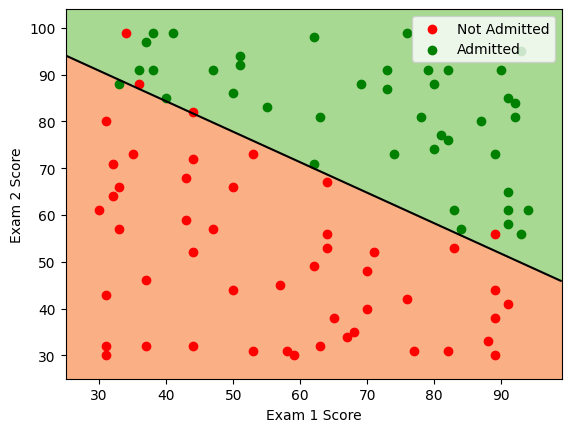

Training Accuracy: 94.44%


In [7]:
#A5Q3

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 90
X = np.column_stack((np.random.randint(30, 100, m), np.random.randint(30, 100, m)))
y = ((0.5*X[:,0] + 0.7*X[:,1] + 5*np.random.randn(m)) > 80).astype(int)
X_norm = (X - X.mean()) / X.std()
X_b = np.c_[np.ones(m), X_norm]


def sigmoid(z): return 1/(1+np.exp(-z))
def cost(X,y,theta): return -np.mean(y*np.log(sigmoid(X@theta)) + (1-y)*np.log(1-sigmoid(X@theta)))
def grad_desc(X,y,theta,a,iters):
    for _ in range(iters):
        theta -= a * X.T @ (sigmoid(X@theta)-y)/m
    return theta
theta = np.zeros(X_b.shape[1])
theta = grad_desc(X_b, y, theta, 0.1, 1000)
print("Optimal theta:", theta)


x1_range = np.linspace(X[:,0].min()-5, X[:,0].max()+5, 300) 
x2_range = np.linspace(X[:,1].min()-5, X[:,1].max()+5, 300)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_norm = (grid - X.mean()) / X.std()
grid_b = np.c_[np.ones(grid.shape[0]), grid_norm]
probs = sigmoid(grid_b @ theta).reshape(xx1.shape)


plt.contourf(xx1, xx2, probs >= 0.5, cmap='RdYlGn', alpha=0.7)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='k', linewidths=1.5)
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='r', label='Not Admitted')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='g', label='Admitted')
plt.xlabel('Exam 1 Score'); plt.ylabel('Exam 2 Score')
plt.legend(); plt.show()
preds = (sigmoid(X_b @ theta) >= 0.5).astype(int)
print(f"Training Accuracy: {np.mean(preds == y)*100:.2f}%") 

C:\Users\Students\AppData\Local\Temp\ipykernel_8856\2734164929.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = mapped @ theta


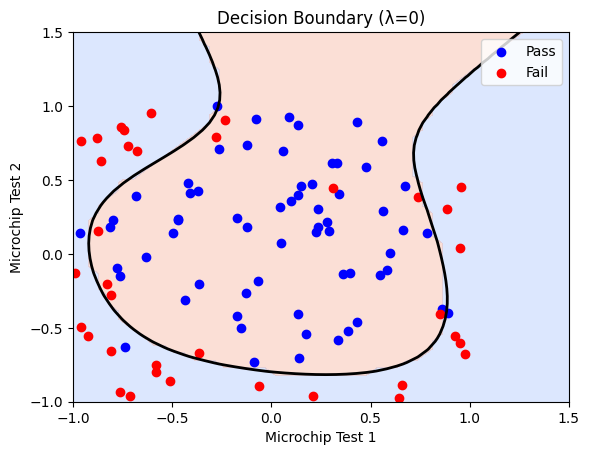

λ = 0 | Training Accuracy = 87.00%


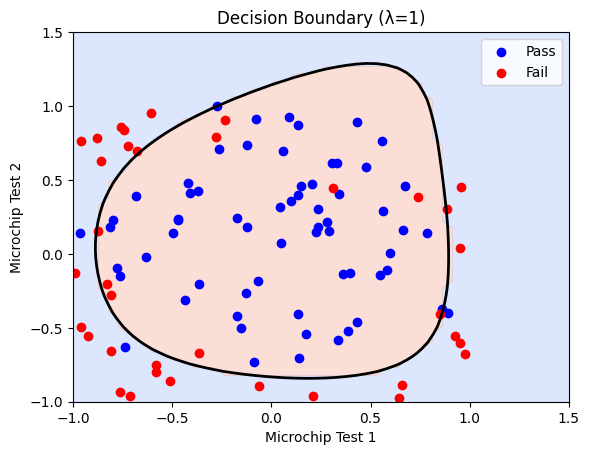

λ = 1 | Training Accuracy = 88.00%


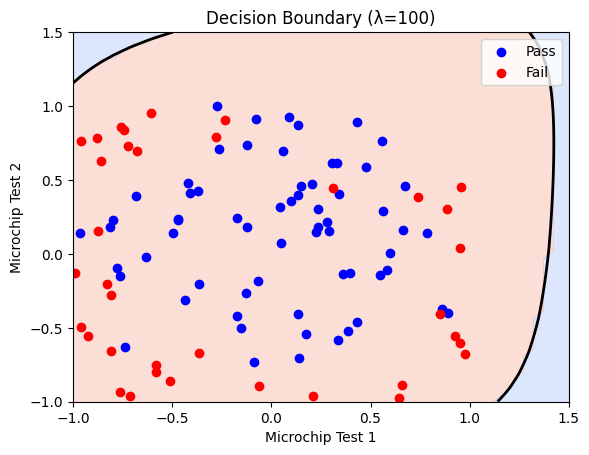

λ = 100 | Training Accuracy = 64.00%

--- Discussion of Results ---
We trained logistic regression with polynomial features of degree 6.
Models were trained with regularization lambdas 0, 1, and 100.

1. Lambda = 0 (No Regularization):
   - Complex boundary, overfitting training data.
2. Lambda = 1 (Moderate Regularization):
   - Smooth boundary, good balance of fit and generalization.
3. Lambda = 100 (High Regularization):
   - Very simple boundary, underfitting the data.

Regularization helps prevent overfitting by penalizing large coefficients.
Choosing the right lambda balances bias and variance.


In [8]:
#A5Q4

import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

# 1. Generate non-linearly separable data (like microchip test results)
np.random.seed(0)
m = 100
x1 = np.random.uniform(-1, 1, m)
x2 = np.random.uniform(-1, 1, m)
y = ((x1**2 + x2**2 + 0.25 * np.random.randn(m)) < 0.8).astype(int)

X = np.column_stack((x1, x2))

# 2. Map features into polynomial terms
def map_feature(x1, x2, degree=6):
    terms = [np.ones_like(x1)]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            terms.append((x1 ** (i - j)) * (x2 ** j))
    return np.column_stack(terms)

X_poly = map_feature(X[:, 0], X[:, 1])
theta = np.zeros(X_poly.shape[1])

# 3. Sigmoid, cost, gradient with regularization
def sigmoid(z):                              
    return 1 / (1 + np.exp(-z))

def compute_cost_reg(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + reg_term

def gradient_reg(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1/m) * (X.T @ (h - y))
    grad[1:] += (lambda_ / m) * theta[1:]
    return grad

# 4. Gradient descent optimizer
def gradient_descent(X, y, theta, alpha, iterations, lambda_):
    for _ in range(iterations):
        grad = gradient_reg(X, y, theta, lambda_)
        theta -= alpha * grad
    return theta

# 5. Plot decision boundary
def plot_decision_boundary(X, y, theta, lambda_):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        for j in range(len(v)):
            mapped = map_feature(np.array([u[i]]), np.array([v[j]]))
            z[i, j] = mapped @ theta

    plt.contourf(u, v, z.T >= 0, alpha=0.3, cmap='coolwarm')
    plt.contour(u, v, z.T, levels=[0], linewidths=2, colors='black')

    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='blue', label='Pass')
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='red', label='Fail')
    plt.title(f"Decision Boundary (λ={lambda_})")
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend()
    plt.show()

# 6. Train for different lambdas and plot
lambdas = [0, 1, 100]
alpha = 1
iterations = 1000

for lambda_ in lambdas:
    theta = np.zeros(X_poly.shape[1])
    theta = gradient_descent(X_poly, y, theta, alpha, iterations, lambda_)
    plot_decision_boundary(X, y, theta, lambda_)

    predictions = (sigmoid(X_poly @ theta) >= 0.5).astype(int)
    acc = np.mean(predictions == y) * 100
    print(f"λ = {lambda_} | Training Accuracy = {acc:.2f}%")


print("\n--- Discussion of Results ---\n"
    "We trained logistic regression with polynomial features of degree 6.\n"
    "Models were trained with regularization lambdas 0, 1, and 100.\n\n"
    "1. Lambda = 0 (No Regularization):\n"
    "   - Complex boundary, overfitting training data.\n"
    "2. Lambda = 1 (Moderate Regularization):\n"
    "   - Smooth boundary, good balance of fit and generalization.\n"
    "3. Lambda = 100 (High Regularization):\n"
    "   - Very simple boundary, underfitting the data.\n\n"
    "Regularization helps prevent overfitting by penalizing large coefficients.\n"
    "Choosing the right lambda balances bias and variance.")

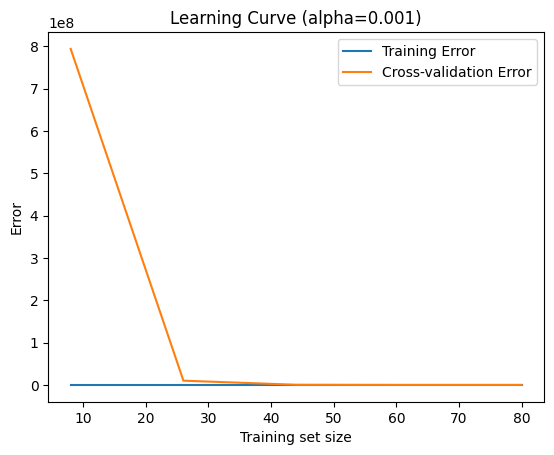

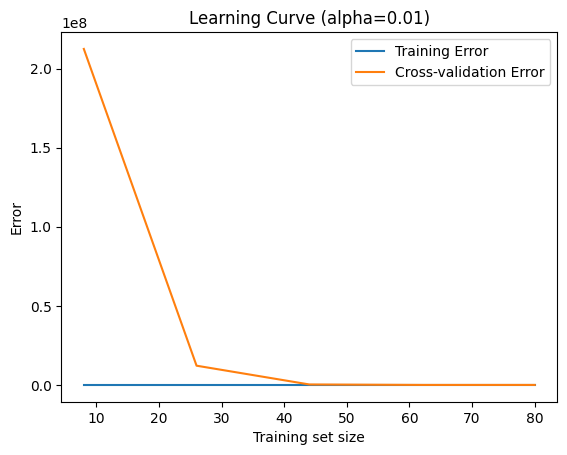

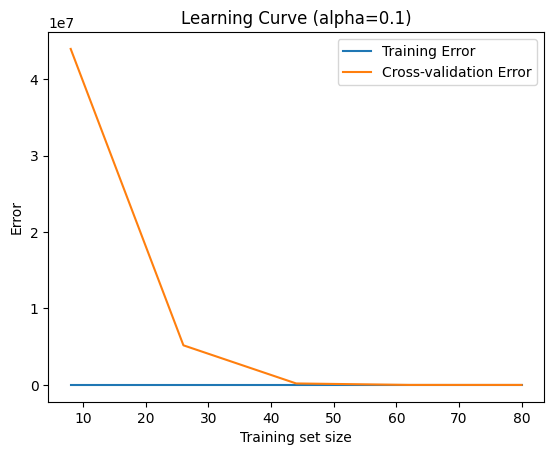

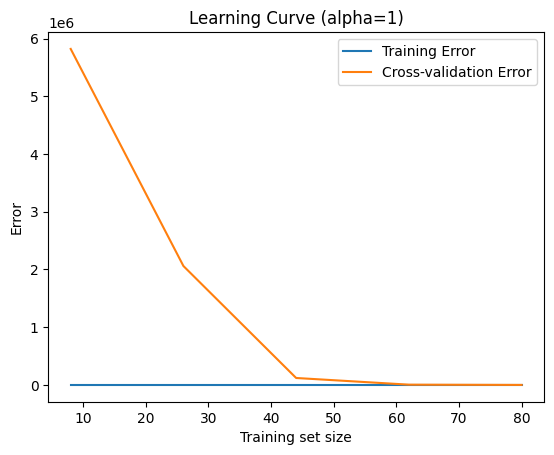

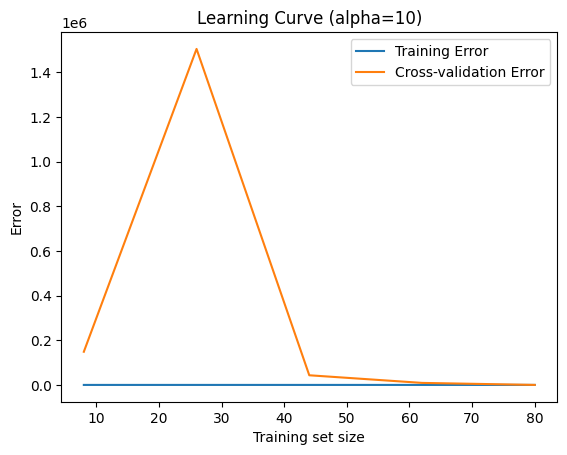

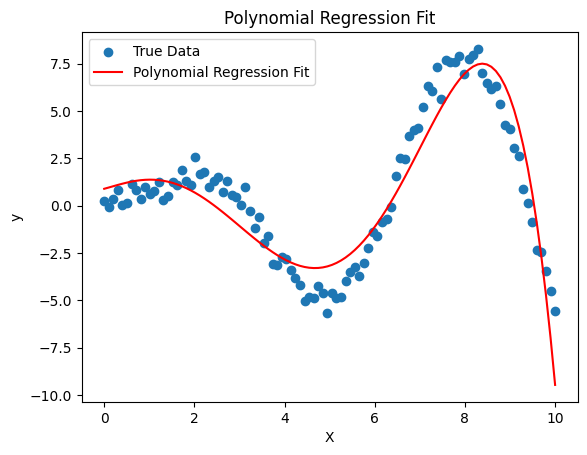

Learned theta: [0.59999983 0.28122906]


In [9]:
#A5Q5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve

# Generate dataset with non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = X * np.sin(X) + np.random.normal(scale=0.5, size=X.shape)

# Map features to polynomial terms (degree 5)
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Implement regularized linear regression
def train_polynomial_regression(X_poly, y, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X_poly, y)
    return model

# Plot learning curves
def plot_learning_curve(X_poly, y, alpha):
    train_sizes, train_scores, cv_scores = learning_curve(
        Ridge(alpha=alpha), X_poly, y, cv=5, scoring="neg_mean_squared_error"
    )
    plt.plot(train_sizes, -np.mean(train_scores, axis=1), label="Training Error")
    plt.plot(train_sizes, -np.mean(cv_scores, axis=1), label="Cross-validation Error")
    plt.xlabel("Training set size")
    plt.ylabel("Error")
    plt.title(f"Learning Curve (alpha={alpha})")
    plt.legend()
    plt.show()

# Vary regularization parameter to observe bias-variance trade-off
alphas = [0.001, 0.01, 0.1, 1, 10]
for alpha in alphas:
    model = train_polynomial_regression(X_poly, y, alpha)
    plot_learning_curve(X_poly, y, alpha)

# Plot polynomial regression fit
plt.scatter(X, y, label="True Data")
plt.plot(X, model.predict(X_poly), color="red", label="Polynomial Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Fit")
plt.show()

data = np.loadtxt('ex2data1.txt', delimiter=',')
X, y = data[:, 0], data[:, 2]
m = len(y)
X_norm = (X - X.mean()) / X.std()
X_b = np.c_[np.ones(m), X_norm]
theta = np.zeros(2)
alpha, iterations = 0.01, 1500
def compute_cost(X, y, theta):
    errors = X @ theta - y
    return np.dot(errors, errors) / (2 * m)
def gradient_descent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        theta -= alpha * (X.T @ (X @ theta - y)) / m
    return theta
theta = gradient_descent(X_b, y, theta, alpha, iterations)
print("Learned theta:", theta)

One-vs-All Logistic Regression Accuracy: 95.93%
Class 0 coefficients shape: (1, 64)
Class 1 coefficients shape: (1, 64)
Class 2 coefficients shape: (1, 64)
Class 3 coefficients shape: (1, 64)
Class 4 coefficients shape: (1, 64)
Class 5 coefficients shape: (1, 64)
Class 6 coefficients shape: (1, 64)
Class 7 coefficients shape: (1, 64)
Class 8 coefficients shape: (1, 64)
Class 9 coefficients shape: (1, 64)


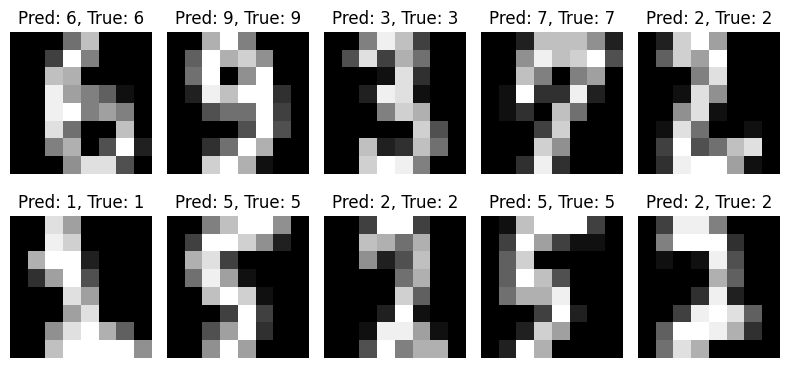

c:\Users\Students\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Scikit-learn LogisticRegression Accuracy: 95.93%


In [10]:
#A5Q6

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load digits dataset (images of 0-9)
digits = load_digits()
X = digits.data  # shape (1797, 64) — 8x8 pixel images
y = digits.target  # labels (0 to 9)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. One-vs-All Logistic Regression
num_classes = len(np.unique(y_train))
classifiers = []

# Train one classifier per class
for c in range(num_classes):
    # Binary target: 1 if class == c, else 0
    y_binary = (y_train == c).astype(int)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_binary)
    classifiers.append(model)

# 4. Predicting with all classifiers
def predict_ova(X):
    probs = np.array([clf.predict_proba(X)[:, 1] for clf in classifiers])  # shape (n_classes, n_samples)
    return np.argmax(probs, axis=0)

y_pred = predict_ova(X_test)

# 5. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-All Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# 6. Show learned coefficients (optional)
for i, clf in enumerate(classifiers):
    print(f"Class {i} coefficients shape: {clf.coef_.shape}")

# 7. Visualization of some digits
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 8. Optional: Comparison using built-in scikit-learn multiclass mode
clf_sklearn = LogisticRegression(max_iter=1000, multi_class='ovr')
clf_sklearn.fit(X_train, y_train)
sklearn_acc = clf_sklearn.score(X_test, y_test)
print(f"\nScikit-learn LogisticRegression Accuracy: {sklearn_acc*100:.2f}%")